# 라이브러리 불러오기

In [11]:
import numpy as np
import pandas as pd

In [12]:
# [AI Hub] 감정 분류를 위한 대화 음성 데이터셋 불러오기
data = pd.read_csv("./data/5차년도_2차.csv", encoding='cp949')

In [13]:
data

,wav_id,발화문,상황,1번 감정,1번 감정세기,2번 감정,2번 감정세기,3번 감정,3번 감정세기,4번 감정,4번감정세기,5번 감정,5번 감정세기,나이,성별
0,5f4141e29dd513131eacee2f,헐! 나 이벤트에 당첨 됐어.,happiness,angry,2,surprise,2,happiness,2,happiness,2,happiness,2,48,female
1,5f4141f59dd513131eacee30,내가 좋아하는 인플루언서가 이벤트를 하더라고. 그래서 그냥 신청 한번 해봤지.,happiness,neutral,0,happiness,2,happiness,2,happiness,2,happiness,2,48,female
2,5f4142119dd513131eacee31,"한 명 뽑는 거였는데, 그게 바로 내가 된 거야.",happiness,angry,2,happiness,2,happiness,2,happiness,2,happiness,2,48,female
3,5f4142279dd513131eacee32,"당연히 마음에 드는 선물이니깐, 이벤트에 내가 신청 한번 해본 거지. 비싼 거야. ...",happiness,angry,2,happiness,2,happiness,2,happiness,2,happiness,1,48,female
4,5f3c9ed98a3c1005aa97c4bd,에피타이저 정말 좋아해. 그 것도 괜찮은 생각인 것 같애.,neutral,happiness,2,happiness,1,happiness,2,happiness,1,happiness,1,48,female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19369,5fbe313c44697678c497c05a,나 엘리베이터에 갇혔어.,fear,happiness,1,sadness,1,sadness,2,sadness,1,sadness,1,23,female
19370,5fbe251044697678c497bfb8,하지만 기분이 나쁜 걸 어떡해?,angry,sadness,1,fear,1,sadness,2,sadness,1,neutral,0,23,female
19371,5fbe31584c55eb78bd7cee7f,자취방 엘리베이턴데 정전인가봐.,fear,sadness,1,neutral,0,sadness,2,fear,1,sadness,1,23,female
19372,5fbe2f8544697678c497c047,나 드디어 프로젝트 끝났어!,happiness,disgust,1,sadness,1,neutral,0,happiness,1,sadness,1,23,female


In [14]:
data.shape

(19374, 15)

In [15]:
df1 = data[['발화문','상황']]

In [16]:
df1

,발화문,상황
0,헐! 나 이벤트에 당첨 됐어.,happiness
1,내가 좋아하는 인플루언서가 이벤트를 하더라고. 그래서 그냥 신청 한번 해봤지.,happiness
2,"한 명 뽑는 거였는데, 그게 바로 내가 된 거야.",happiness
3,"당연히 마음에 드는 선물이니깐, 이벤트에 내가 신청 한번 해본 거지. 비싼 거야. ...",happiness
4,에피타이저 정말 좋아해. 그 것도 괜찮은 생각인 것 같애.,neutral
...,...,...
19369,나 엘리베이터에 갇혔어.,fear
19370,하지만 기분이 나쁜 걸 어떡해?,angry
19371,자취방 엘리베이턴데 정전인가봐.,fear
19372,나 드디어 프로젝트 끝났어!,happiness


In [17]:
df1.rename(columns = {'발화문' : 'chat', '상황' : 'emotion'}, inplace = True)

C:\Users\hi\AppData\Local\Temp\ipykernel_14048\2760186397.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.rename(columns = {'발화문' : 'chat', '상황' : 'emotion'}, inplace = True)


In [18]:
df1

,chat,emotion
0,헐! 나 이벤트에 당첨 됐어.,happiness
1,내가 좋아하는 인플루언서가 이벤트를 하더라고. 그래서 그냥 신청 한번 해봤지.,happiness
2,"한 명 뽑는 거였는데, 그게 바로 내가 된 거야.",happiness
3,"당연히 마음에 드는 선물이니깐, 이벤트에 내가 신청 한번 해본 거지. 비싼 거야. ...",happiness
4,에피타이저 정말 좋아해. 그 것도 괜찮은 생각인 것 같애.,neutral
...,...,...
19369,나 엘리베이터에 갇혔어.,fear
19370,하지만 기분이 나쁜 걸 어떡해?,angry
19371,자취방 엘리베이턴데 정전인가봐.,fear
19372,나 드디어 프로젝트 끝났어!,happiness


# 두번째 데이터 통합

In [19]:
# [AI Hub] 감정 분류를 위한 대화 음성 데이터셋 불러오기
data = pd.read_csv('./data/감성대화말뭉치(최종데이터)_Training.csv')

In [20]:
data

,Unnamed: 0,연령,성별,상황키워드,신체질환,감정_대분류,감정_소분류,사람문장1,시스템문장1,사람문장2,시스템문장2,사람문장3,시스템문장3
0,1,청년,여성,"진로,취업,직장",해당없음,분노,노여워하는,일은 왜 해도 해도 끝이 없을까? 화가 난다.,많이 힘드시겠어요. 주위에 의논할 상대가 있나요?,그냥 내가 해결하는 게 나아. 남들한테 부담 주고 싶지도 않고.,혼자 해결하기로 했군요. 혼자서 해결하기 힘들면 주위에 의논할 사람을 찾아보세요.,NaN,NaN
1,2,청년,여성,"진로,취업,직장",해당없음,분노,노여워하는,이번 달에 또 급여가 깎였어! 물가는 오르는데 월급만 자꾸 깎이니까 너무 화가 나.,급여가 줄어 속상하시겠어요. 월급이 줄어든 것을 어떻게 보완하실 건가요?,최대한 지출을 억제해야겠어. 월급이 줄어들었으니 고정지출을 줄일 수밖에 없을 것 같아.,월급이 줄어든 만큼 소비를 줄일 계획이군요.,NaN,NaN
2,3,청년,여성,"진로,취업,직장",해당없음,분노,노여워하는,회사에 신입이 들어왔는데 말투가 거슬려. 그런 애를 매일 봐야 한다고 생각하니까 스...,회사 동료 때문에 스트레스를 많이 받는 것 같아요. 문제 해결을 위해 어떤 노력을 ...,잘 안 맞는 사람이랑 억지로 잘 지내는 것보단 조금은 거리를 두고 예의를 갖춰서 대...,스트레스받지 않기 위해선 인간관계에 있어 약간의 거리를 두는 게 좋겠군요.,NaN,NaN
3,4,청년,여성,"진로,취업,직장",해당없음,분노,노여워하는,직장에서 막내라는 이유로 나에게만 온갖 심부름을 시켜. 일도 많은 데 정말 분하고 ...,관련 없는 심부름을 모두 하게 되어서 노여우시군요. 어떤 것이 상황을 나아질 수 있...,직장 사람들과 솔직하게 이야기해보고 싶어. 일하는 데에 방해된다고.,직장 사람들과 이야기를 해 보겠다고 결심하셨군요.,NaN,NaN
4,5,청년,여성,"진로,취업,직장",해당없음,분노,노여워하는,얼마 전 입사한 신입사원이 나를 무시하는 것 같아서 너무 화가 나.,무시하는 것 같은 태도에 화가 나셨군요. 상대방의 어떤 행동이 그런 감정을 유발하는...,상사인 나에게 먼저 인사하지 않아서 매일 내가 먼저 인사한다고!,항상 먼저 인사하게 되어 화가 나셨군요. 어떻게 하면 신입사원에게 화났음을 표현할 ...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51625,51626,노년,남성,재정,만성질환 무,분노,성가신,나이가 먹고 이제 돈도 못 벌어 오니까 어떻게 살아가야 할지 막막해. 능력도 없고.,경제적인 문제 때문에 막막하시군요. 마음이 편치 않으시겠어요.,아무것도 할 수 없는 내가 무가치하게 느껴지고 실망스러워.,지금 할 수 있는 가장 합리적인 행동은 무엇인가요?,노년층을 위한 경제적 지원이나 부업 같은 것도 알아보아야겠어.,좋은 결과 얻으시길 바랄게요.
51626,51627,노년,여성,재정,만성질환 무,불안,초조한,몸이 많이 약해졌나 봐. 이제 전과 같이 일하지 못할 것 같아 너무 짜증 나.,건강에 대한 어려움 때문에 기분이 좋지 않으시군요. 속상하시겠어요.,마음 같아서는 다 할 수 있는 일인데 이젠 몸이 안 따라와 주니 화만 나.,어떻게 하면 지금의 기분을 나아지게 할 수 있을까요?,남편과 함께 게이트볼이나 치러 가야겠어. 그럼 기분이 나아질 것 같아.,남편과 함께하는 좋은 외출 시간 되시길 바랄게요.
51627,51628,노년,여성,재정,만성질환 무,상처,희생된,이제 어떻게 해야 할지 모르겠어. 남편도 그렇고 노후 준비도 안 되어서 미래가 걱정돼.,노후 준비에 대한 어려움 때문에 걱정이 많으시겠어요.,주변 사람들은 다 노후 준비도 잘해두었던데 난 어떻게 해야 할지 모르겠어. 막막하기...,지금의 상황에서 할 수 있는 가장 좋은 행동이 무엇일까요?,남편과 함께 실버 일자리나 노년층을 위한 국가 지원에 대해 자세히 알아보아야겠어.,좋은 정보 많이 얻으셔서 걱정을 좀 덜으셨으면 좋겠어요.
51628,51629,노년,여성,대인관계,만성질환 무,불안,걱정스러운,몇십 년을 함께 살았던 남편과 이혼했어. 그동안의 세월에 배신감을 느끼고 너무 화가 나.,가족과의 문제 때문에 속상하시겠어요.,이제 할 수 있는 일도 없고 이렇게 힘들게 사는 게 불만스럽기만 해.,지금의 감정을 나아지게 할 수 있는 어떤 방법이 있을까요?,함께 친하게 지내던 동네 언니 동생들과 빈자리를 조금이나마 채울까 해.,지인분들과 좋은 시간 보내셨으면 좋겠어요.


In [21]:
data.shape

(51630, 13)

In [22]:
data = data.rename(columns={'사람문장1':'chat', '감정_대분류':'emotion'})

In [23]:
df2 = data[['chat','emotion']]

In [24]:
df2

,chat,emotion
0,일은 왜 해도 해도 끝이 없을까? 화가 난다.,분노
1,이번 달에 또 급여가 깎였어! 물가는 오르는데 월급만 자꾸 깎이니까 너무 화가 나.,분노
2,회사에 신입이 들어왔는데 말투가 거슬려. 그런 애를 매일 봐야 한다고 생각하니까 스...,분노
3,직장에서 막내라는 이유로 나에게만 온갖 심부름을 시켜. 일도 많은 데 정말 분하고 ...,분노
4,얼마 전 입사한 신입사원이 나를 무시하는 것 같아서 너무 화가 나.,분노
...,...,...
51625,나이가 먹고 이제 돈도 못 벌어 오니까 어떻게 살아가야 할지 막막해. 능력도 없고.,분노
51626,몸이 많이 약해졌나 봐. 이제 전과 같이 일하지 못할 것 같아 너무 짜증 나.,불안
51627,이제 어떻게 해야 할지 모르겠어. 남편도 그렇고 노후 준비도 안 되어서 미래가 걱정돼.,상처
51628,몇십 년을 함께 살았던 남편과 이혼했어. 그동안의 세월에 배신감을 느끼고 너무 화가 나.,불안


# 3번째 데이터

In [25]:
# AI-HUB 감정 및 발화스타일 동시 고려 음성 합성(대화체만 사용)
import os
import json

path = "./data/json"
file_list = os.listdir(path)
print("file_list {}".format(file_list))

file_list ['D-A101-P03-A-063.json', 'D-A101-P03-A-070.json', 'D-A101-P03-A-071.json', 'D-A101-P03-B-025.json', 'D-A101-P03-B-033.json', 'D-A101-P03-B-065.json', 'D-A101-P03-C-034.json', 'D-A101-P03-C-046.json', 'D-A101-P03-C-048.json', 'D-A101-P03-D-005.json', 'D-A101-P03-D-010.json', 'D-A101-P03-D-027.json', 'D-A101-P03-D-049.json', 'D-A101-P03-E-042.json', 'D-A101-P03-E-043.json', 'D-A101-P03-F-031.json', 'D-A101-P03-F-056.json', 'D-A101-P03-G-032.json', 'D-A101-P03-G-041.json', 'D-A101-P03-G-067.json', 'D-A102-P04-A-063.json', 'D-A102-P04-A-070.json', 'D-A102-P04-A-071.json', 'D-A102-P04-B-025.json', 'D-A102-P04-B-033.json', 'D-A102-P04-B-065.json', 'D-A102-P04-C-034.json', 'D-A102-P04-C-046.json', 'D-A102-P04-C-048.json', 'D-A102-P04-D-005.json', 'D-A102-P04-D-010.json', 'D-A102-P04-D-027.json', 'D-A102-P04-D-049.json', 'D-A102-P04-E-042.json', 'D-A102-P04-E-043.json', 'D-A102-P04-F-031.json', 'D-A102-P04-F-056.json', 'D-A102-P04-G-032.json', 'D-A102-P04-G-041.json', 'D-A102-P04-G-

In [26]:
len(file_list)

2860

In [31]:
# 빈 데이터프레임을 생성
df3 = pd.DataFrame(columns=['chat', 'emotion'])

In [32]:
df3

,chat,emotion


In [33]:
# 데이터 불러와서 df3 에 저장하는 명령
i = 0
for dd in file_list:
    ff = path + "/" + dd

    i = i + 1
    if i % 100 == 0:
        print( str(i) + ' - ' + ff )
    
    with open(ff, 'r', encoding='UTF8') as f:
        json_data = json.load(f)

        # print('data =', json_data)

        text_info = json_data[0]['sentences']

        for info in text_info:
            # print('info = ', info)
            text = info['origin_text']
            emotion = info['style']['emotion']

            # print(text)
            # print(emotion)

            pos = df3['chat'].count()

            df3.loc[pos]=[text, emotion]

100 - ./data/json/D-A103-P07-G-067.json
200 - ./data/json/D-A104-P12-G-067.json
300 - ./data/json/D-A202-P06-C-001.json
400 - ./data/json/D-A204-P12-A-039.json
500 - ./data/json/D-A302-P06-B-021.json
600 - ./data/json/D-A304-P12-B-064.json
700 - ./data/json/D-A306-P18-D-062.json
800 - ./data/json/D-H103-P07-E-042.json
900 - ./data/json/D-H104-P12-E-042.json
1000 - ./data/json/D-H203-P07-A-052.json
1100 - ./data/json/D-H205-P13-A-016.json
1200 - ./data/json/D-H302-P04-F-008.json
1300 - ./data/json/D-H304-P10-F-008.json
1400 - ./data/json/D-H306-P17-A-013.json
1500 - ./data/json/D-NX02-P06-D-002.json
1600 - ./data/json/D-NX04-P10-D-002.json
1700 - ./data/json/D-NX05-P14-D-002.json
1800 - ./data/json/D-NY02-P04-B-065.json
1900 - ./data/json/D-NY03-P08-A-039.json
2000 - ./data/json/D-NY04-P11-E-042.json
2100 - ./data/json/D-NY05-P15-C-046.json
2200 - ./data/json/D-S103-P07-C-034.json
2300 - ./data/json/D-S104-P12-C-034.json
2400 - ./data/json/D-S202-P04-C-024.json
2500 - ./data/json/D-S204

In [34]:
df3.shape

(136658, 2)

In [35]:
# 병합 3개의 데이터셋을 하나로 병합
total_df = pd.concat([df1, df2, df3])

In [36]:
total_df

,chat,emotion
0,헐! 나 이벤트에 당첨 됐어.,happiness
1,내가 좋아하는 인플루언서가 이벤트를 하더라고. 그래서 그냥 신청 한번 해봤지.,happiness
2,"한 명 뽑는 거였는데, 그게 바로 내가 된 거야.",happiness
3,"당연히 마음에 드는 선물이니깐, 이벤트에 내가 신청 한번 해본 거지. 비싼 거야. ...",happiness
4,에피타이저 정말 좋아해. 그 것도 괜찮은 생각인 것 같애.,neutral
...,...,...
136653,"뭐라고, 도대체 무슨 일이지?",슬픔
136654,"꼬마 틸틸에 대해 당신에게 전에 말한 적이 있잖아요, 그 나무꾼 아들 말이에요, 그...",슬픔
136655,"그런데 그 애가 이리로 오고 있어요, 당신에게 파랑새를 요구하기 위해서…",슬픔
136656,아직 파랑새를 찾지 못했구나…,슬픔


In [37]:
# 합치게되면 index값이 틀어지는 문제가 발생 rest_index
total_df = total_df.reset_index()

In [38]:
# 인덱스를 제외한 최종본
total_df = total_df[['chat', 'emotion']]

In [39]:
# 파일로 저장
total_df.to_csv("./total_df.csv")

In [40]:
# emotion의 종류를  확인
total_df['emotion'].unique()

array(['happiness', 'neutral', 'sadness', 'angry', 'surprise', 'disgust',
       'fear', '분노', '기쁨', '불안', '당황', '슬픔', '상처', '무감정'], dtype=object)

In [41]:
total_df.loc[total_df['emotion'] == '기쁨', 'emotion'] = 'happiness'

In [42]:
total_df.loc[total_df['emotion'] == '무감정', 'emotion'] = 'neutral'

In [43]:
total_df.loc[total_df['emotion'] == '슬픔', 'emotion'] = 'sadness'

In [44]:
total_df.loc[total_df['emotion'] == '분노', 'emotion'] = 'angry'

In [45]:
total_df.loc[total_df['emotion'] == '당황', 'emotion'] = 'surprise'

In [46]:
total_df.loc[total_df['emotion'] == '불안', 'emotion'] = 'fear'

In [47]:
total_df.loc[total_df['emotion'] == '상처', 'emotion'] = 'disgust'

In [48]:
# emotion의 종류를  확인
total_df['emotion'].unique()

array(['happiness', 'neutral', 'sadness', 'angry', 'surprise', 'disgust',
       'fear'], dtype=object)

# 시각화

In [49]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [50]:
import seaborn as sns

<Axes: xlabel='emotion', ylabel='Count'>

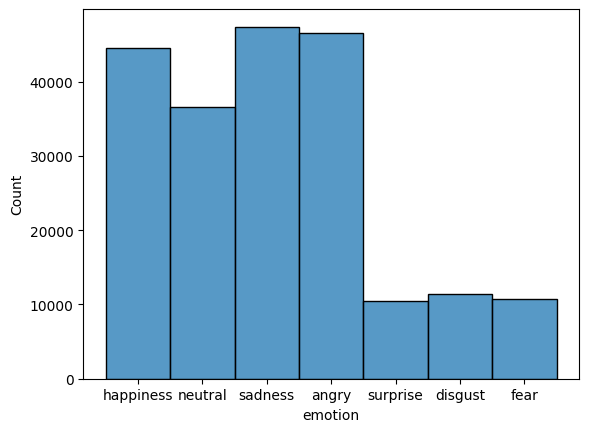

In [51]:
sns.histplot(data=total_df, x='emotion')